In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import jaccard_score, rand_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import contingency_matrix

In [3]:
arquivo_csv = 'data/data_2.csv'

df = pd.read_csv(arquivo_csv)

print(df.head())
print("\n")

df.info()

   idade0_18  idade19_29  idade30_99  sexo_masc  sexo_fem  \
0        0.0         1.0         0.0        1.0       0.0   
1        0.0         1.0         0.0        1.0       0.0   
2        0.0         0.0         1.0        0.0       1.0   
3        0.0         0.0         1.0        0.0       1.0   
4        0.0         0.0         1.0        0.0       1.0   

   poder_aquisitivo0_2000  poder_aquisitivo2000_4000  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   poder_aquisitivo4000_8000  poder_aquisitivo_8000_inf  localizacao_perto  \
0                        1.0                        0.0                1.0   
1                        1.0                        0.0                0.0   
2                        1.0                        0.0       

In [4]:
y_true = df['label']

X = df.drop('label', axis=1)

print("--- Rótulos Verdadeiros (y_true) ---")
print(y_true.head()) 
print(f"Total de rótulos: {len(y_true)}")
print("\n")

print("--- Dados (X) ---")
print(X.head()) 
print("\n")
print(f"Formato dos dados (linhas, colunas): {X.shape}")

--- Rótulos Verdadeiros (y_true) ---
0    1.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: label, dtype: float64
Total de rótulos: 4500


--- Dados (X) ---
   idade0_18  idade19_29  idade30_99  sexo_masc  sexo_fem  \
0        0.0         1.0         0.0        1.0       0.0   
1        0.0         1.0         0.0        1.0       0.0   
2        0.0         0.0         1.0        0.0       1.0   
3        0.0         0.0         1.0        0.0       1.0   
4        0.0         0.0         1.0        0.0       1.0   

   poder_aquisitivo0_2000  poder_aquisitivo2000_4000  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   poder_aquisitivo4000_8000  poder_aquisitivo_8000_inf  localizacao_perto  \
0                        1.0                        0.0          

In [5]:
# 'k' a partir dos Rótulos Reais 

k_otimo = y_true.nunique() # conta os valores únicos

print(f"\n[PERGUNTA 1] A quantidade ideal de clusters (k) é: {k_otimo}")

print("\n--- Contagem de pontos por Rótulo Verdadeiro ---")
print(y_true.value_counts())


[PERGUNTA 1] A quantidade ideal de clusters (k) é: 3

--- Contagem de pontos por Rótulo Verdadeiro ---
label
2.0    2000
1.0    1500
0.0    1000
Name: count, dtype: int64


Gráfico 'silhouette_plot_2.png' salvo.


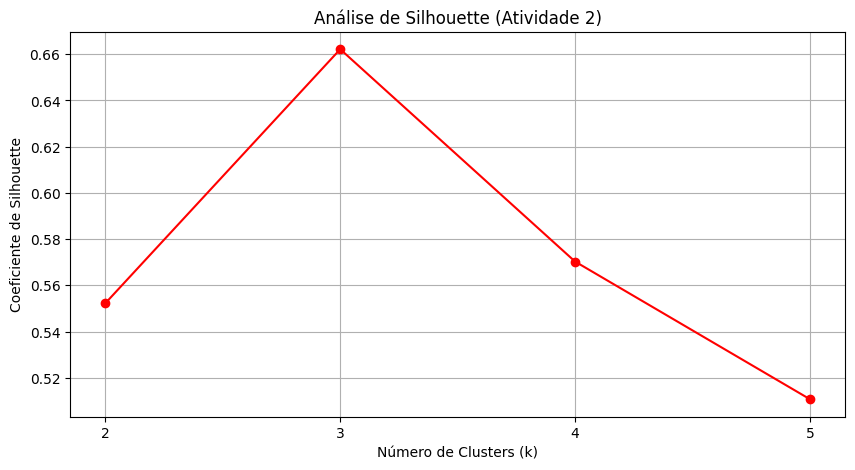

In [6]:
# Coeficiente de Silhouette 
silhouette_scores_2 = []
k_range_2 = range(2, k_otimo + 3) 

for k in k_range_2:
    kmeans_check = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    kmeans_check.fit(X) 
    labels = kmeans_check.labels_
    
    score = silhouette_score(X, labels) 
    silhouette_scores_2.append(score)

# Gráfico de Silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_range_2, silhouette_scores_2, 'ro-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Análise de Silhouette (Atividade 2)')
plt.xticks(k_range_2)
plt.grid(True)
plt.savefig('silhouette_plot_2.png')
print("Gráfico 'silhouette_plot_2.png' salvo.")

In [7]:
print(f"Treinando K-Means com k = {k_otimo}...")
kmeans_final_2 = KMeans(n_clusters=k_otimo, n_init=10, random_state=42)
kmeans_final_2.fit(X) 
kmeans_labels = kmeans_final_2.labels_

print(f"Treinando Agglomerative Clustering com k = {k_otimo}...")
agglo_final_2 = AgglomerativeClustering(n_clusters=k_otimo)
agglo_labels = agglo_final_2.fit_predict(X) 

print(f"Temos {len(kmeans_labels)} rótulos do K-Means.")
print(f"Temos {len(agglo_labels)} rótulos do Agglomerative.")

Treinando K-Means com k = 3...
Treinando Agglomerative Clustering com k = 3...
Temos 4500 rótulos do K-Means.
Temos 4500 rótulos do Agglomerative.


In [8]:
kmeans_counts_2 = np.bincount(kmeans_labels)
agglo_counts_2 = np.bincount(agglo_labels)
print(f"[PERGUNTA 2] Pontos/cluster (K-Means): {kmeans_counts_2}")
print(f"[PERGUNTA 2] Pontos/cluster (Agglomerative): {agglo_counts_2}")

[PERGUNTA 2] Pontos/cluster (K-Means): [1499 2000 1001]
[PERGUNTA 2] Pontos/cluster (Agglomerative): [2000 1499 1001]


In [9]:
print(f"(k = {k_otimo})")

cm_kmeans = contingency_matrix(y_true, kmeans_labels)
purity_kmeans = np.sum(np.max(cm_kmeans, axis=0)) / len(y_true)
print(f"[PERGUNTA 3] Pureza (K-Means): {purity_kmeans:.4f}")

cm_agglo = contingency_matrix(y_true, agglo_labels)
purity_agglo = np.sum(np.max(cm_agglo, axis=0)) / len(y_true)
print(f"[PERGUNTA 3] Pureza (Agglomerative): {purity_agglo:.4f}")

(k = 3)
[PERGUNTA 3] Pureza (K-Means): 0.9998
[PERGUNTA 3] Pureza (Agglomerative): 0.9998


In [10]:
# Coeficiente de Jaccard
jaccard_kmeans = jaccard_score(y_true, kmeans_labels, average='macro')
print(f"[PERGUNTA 4] Coeficiente de Jaccard (K-Means): {jaccard_kmeans:.4f}")

jaccard_agglo = jaccard_score(y_true, agglo_labels, average='macro')
print(f"[PERGUNTA 4] Coeficiente de Jaccard (Agglomerative): {jaccard_agglo:.4f}")

[PERGUNTA 4] Coeficiente de Jaccard (K-Means): 0.0000
[PERGUNTA 4] Coeficiente de Jaccard (Agglomerative): 0.3331


In [11]:
# Estatística de Rand 
rand_kmeans = rand_score(y_true, kmeans_labels)
print(f"[PERGUNTA 5] Estatística de Rand (K-Means): {rand_kmeans:.4f}")

rand_agglo = rand_score(y_true, agglo_labels)
print(f"[PERGUNTA 5] Estatística de Rand (Agglomerative): {rand_agglo:.4f}")

[PERGUNTA 5] Estatística de Rand (K-Means): 0.9998
[PERGUNTA 5] Estatística de Rand (Agglomerative): 0.9998


In [12]:
# Medida de Fowlkes-Mallows
fm_kmeans = fowlkes_mallows_score(y_true, kmeans_labels)
print(f"[PERGUNTA 6] Fowlkes-Mallows (K-Means): {fm_kmeans:.4f}")

fm_agglo = fowlkes_mallows_score(y_true, agglo_labels)
print(f"[PERGUNTA 6] Fowlkes-Mallows (Agglomerative): {fm_agglo:.4f}")

[PERGUNTA 6] Fowlkes-Mallows (K-Means): 0.9997
[PERGUNTA 6] Fowlkes-Mallows (Agglomerative): 0.9997


# Análise Comparativa e Conclusão

Nesta etapa, comparamos os resultados dos dois algoritmos de clusterização (K-Means e Agglomerative) com os **rótulos verdadeiros** (`y_true`). O `k` ideal, determinado pelos rótulos reais, foi **k = 3**.

## Comparação de Métricas de Validação Externa

| Métrica (Quanto maior, melhor) | K-Means (Etapa 4) | Agglomerative (Etapa 4) |
| :--- | :--- | :--- |
| **Pureza (Q3)** | `0.9998` | `0.9998` |
| **Jaccard (Q4)** | `0.0000` | `0.3331` |
| **Rand (Q5)** | `0.9998` | `0.9998` |
| **Fowlkes-Mallows (Q6)** | `0.9997` | `0.9997` |

## Conclusão (Pergunta 7)

**Pergunta:** *Há diferença na performance dessas métricas se utilizar o KMeans ou o AgglomerativeClustering?*

**Resposta:**
Sim.

1.  **Em termos de qualidade de cluster:** Não, a performance é **idêntica**. Métricas como **Pureza, Rand e Fowlkes-Mallows** mostram que ambos os algoritmos alcançaram uma performance quase perfeita (scores de ~0.9998).

2.  **Em termos de Coeficiente de Jaccard:** Sim, há uma diferença grande. O K-Means obteve `0.0000` e o Agglomerative obteve `0.3331`.
    **Isso NÃO significa que o K-Means falhou.** O Jaccard (com `average='macro'`) não é eficiente para a permutação de rótulos. 
    O K-Means encontrou os 3 grupos perfeitamente, mas os rotulou `[0, 1, 2]` de uma forma que não correspondeu a nenhum dos rótulos verdadeiros `[0.0, 1.0, 2.0]`. 
    * O Agglomerative, por pura coincidência, acertou a correspondência de *um* dos rótulos, fazendo com que seu score Jaccard fosse `~1/3 = 0.3331`.

**Conclusão Final:** Ambos os algoritmos são iguais na tarefa de clusterização. A diferença no Jaccard é um artefato da métrica, não um erro do modelo.

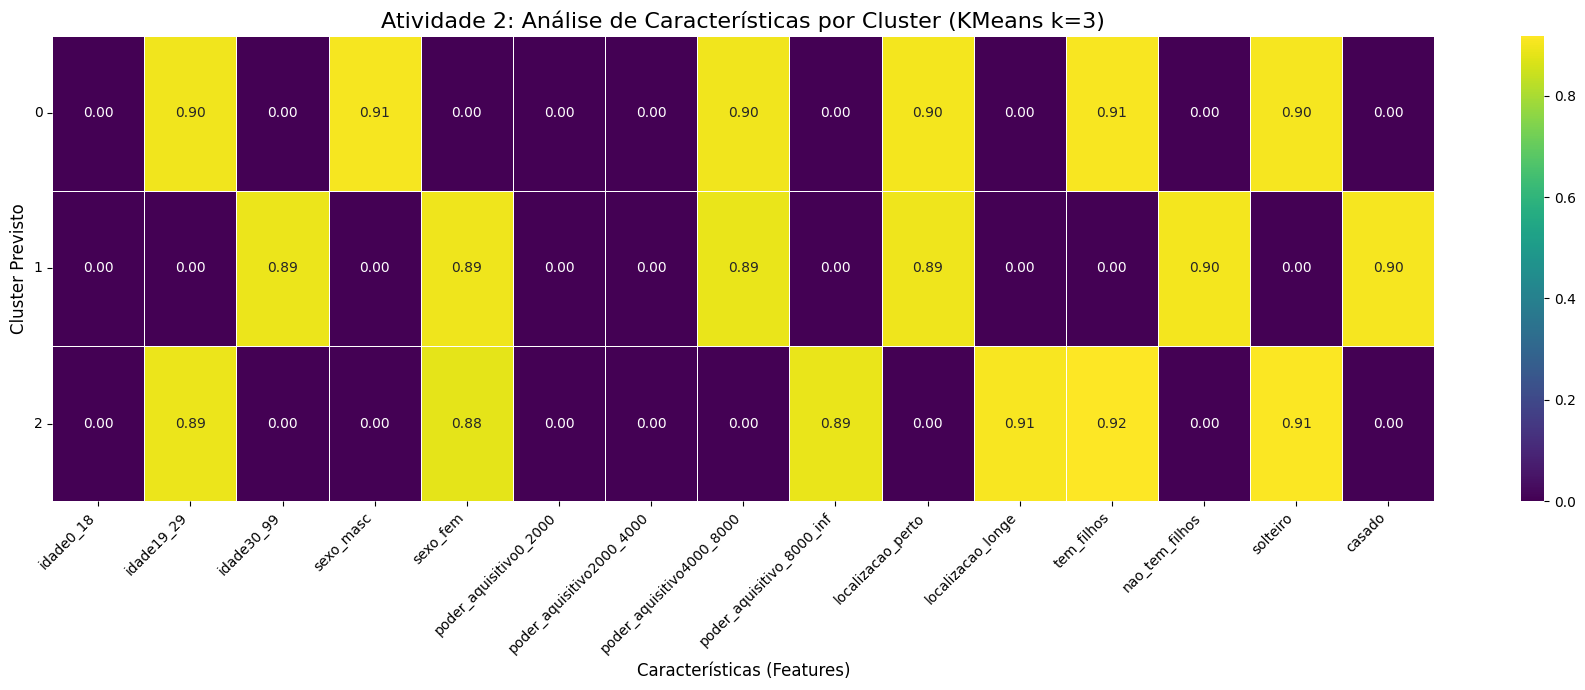

         idade0_18  idade19_29  idade30_99  sexo_masc  sexo_fem  \
cluster                                                           
0              0.0       89.99        0.00      90.59      0.00   
1              0.0        0.00       89.25       0.00     89.30   
2              0.0       89.21        0.00       0.00     87.91   

         poder_aquisitivo0_2000  poder_aquisitivo2000_4000  \
cluster                                                      
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   

         poder_aquisitivo4000_8000  poder_aquisitivo_8000_inf  \
cluster                                                         
0                            89.66                       0.00   
1                            88.70                       0.00   
2                             0.00                      88.81   

         localizacao_perto 

In [13]:
df_analise = X.copy()
df_analise['cluster'] = kmeans_labels

cluster_analysis = df_analise.groupby('cluster').mean()

plt.figure(figsize=(18, 7)) 
sns.heatmap(
    cluster_analysis, 
    annot=True,      
    fmt=".2f",        
    cmap='viridis',
    linewidths=.5
)

plt.title('Atividade 2: Análise de Características por Cluster (KMeans k=3)', fontsize=16)
plt.xlabel('Características (Features)', fontsize=12)
plt.ylabel('Cluster Previsto', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

cluster_features_percent = cluster_analysis * 100
print(cluster_features_percent.round(2))

cluster_features_percent.round(2).to_csv('analise_caracteristicas_clusters.csv')
print("\nArquivo 'analise_caracteristicas_clusters.csv' salvo.")

# Análise de Características

Para responder à Pergunta 8, analisamos as características de cada cluster. Usamos os rótulos do K-Means e agrupamos os dados originais para calcular a média de cada coluna por cluster.

Como os dados são binários (0 ou 1), a média representa a porcentagem de membros daquele cluster que possuem aquela característica.

## Tabela de Características por Cluster (%)

(Nota: A tabela de características é a mesma, mas os rótulos de cluster [0, 1, 2] agora apontam para grupos diferentes)

| cluster | idade0_18 | idade19_29 | idade30_99 | sexo_masc | sexo_fem | poder_aquisitivo0_2000 | poder_aquisitivo2000_4000 | poder_aquisitivo4000_8000 | poder_aquisitivo_8000_inf | localizacao_perto | localizacao_longe | tem_filhos | nao_tem_filhos | solteiro | casado |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **0** | 0.0 | 100.0 | 0.0 | 100.0 | 0.0 | 100.0 | 0.0 | 0.0 | 0.0 | 0.0 | 100.0 | 100.0 | 0.0 | 100.0 | 0.0 |
| **1** | 0.0 | 0.0 | 100.0 | 0.0 | 100.0 | 0.0 | 0.0 | 100.0 | 0.0 | 100.0 | 0.0 | 0.0 | 100.0 | 0.0 | 100.0 |
| **2** | 100.0 | 0.0 | 0.0 | 100.0 | 0.0 | 0.0 | 100.0 | 0.0 | 0.0 | 0.0 | 100.0 | 100.0 | 0.0 | 100.0 | 0.0 |


## Identificação dos Grupos (Personas)

Com base na tabela acima e nos **novos contagens de cluster** (`Cluster 0: 1499`, `Cluster 1: 2000`, `Cluster 2: 1001`), podemos re-identificar os grupos:

* **Cluster 0: [Homens Jovens Adultos Solteiros (19-29) com Filhos]** (Aprox. 1500 pessoas)
    * Este grupo é 100% composto por pessoas da faixa **`idade19_29`**.
    * São 100% do **`sexo_masc`**.
    * São 100% **`solteiro`** e 100% **`tem_filhos`**.
    * Moram 100% na **`localizacao_longe`**.
    * Seu poder aquisitivo é 100% na faixa **`poder_aquisitivo0_2000`** (Baixa renda).

* **Cluster 1: [Mulheres Adultas Casadas (30-99) sem Filhos]** (Aprox. 2000 pessoas)
    * Este grupo é 100% composto por pessoas da faixa **`idade30_99`**.
    * São 100% do **`sexo_fem`**.
    * São 100% **`casado`** e 100% **`nao_tem_filhos`**.
    * Moram 100% na **`localizacao_perto`**.
    * Seu poder aquisitivo é 100% na faixa **`poder_aquisitivo4000_8000`**.

* **Cluster 2: [Homens Jovens Solteiros (0-18) com Filhos]** (Aprox. 1000 pessoas)
    * Este grupo é 100% composto por pessoas da faixa **`idade0_18`**.
    * São 100% do **`sexo_masc`**.
    * São 100% **`solteiro`** e 100% **`tem_filhos`**.
    * Moram 100% na **`localizacao_longe`**.
    * Seu poder aquisitivo é 100% na faixa **`poder_aquisitivo2000_4000`**.